In [1]:
import gdal

from SatelliteUtils import plot_map

gdal.UseExceptions()

In [2]:
#AWS Way
#require aws_access_key_id, aws_secret_access_key in sentinelhub.config(system variables)

from sentinelhub import AwsProductRequest

productA = 'S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206'
productB = 'S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206'

sentinel_folder = "data/Sentinel.Local"

requestA = AwsProductRequest(product_id=productA, data_folder=sentinel_folder, safe_format=True)
requestB = AwsProductRequest(product_id=productB, data_folder=sentinel_folder, safe_format=True)

requestA.save_data()
requestB.save_data()

In [3]:
pathA = f"{sentinel_folder}/{productA}.SAFE/MTD_MSIL2A.xml"
pathB = f"{sentinel_folder}/{productB}.SAFE/MTD_MSIL2A.xml"
sentinelA = gdal.Open(pathA)
sentinelB = gdal.Open(pathB)

In [4]:
A10 = gdal.Open(sentinelA.GetSubDatasets()[0][0])
B10 = gdal.Open(sentinelB.GetSubDatasets()[0][0])

In [5]:
vrt = gdal.BuildVRT(f"{sentinel_folder}/Sentinel.vrt", [A10,B10])
sentinel = gdal.Translate(f"{sentinel_folder}/Sentinel.tiff", vrt)

In [7]:
sentinel4326 = gdal.Warp(f"{sentinel_folder}/Sentinel4326.tiff", sentinel, dstSRS="EPSG:4326")

In [8]:
sentinelKyiv = gdal.Warp(f"{sentinel_folder}/Kyiv.tiff", sentinel4326, cutlineDSName="data/KyivRegionShape/Kyiv_regions.shp", cropToCutline=True)

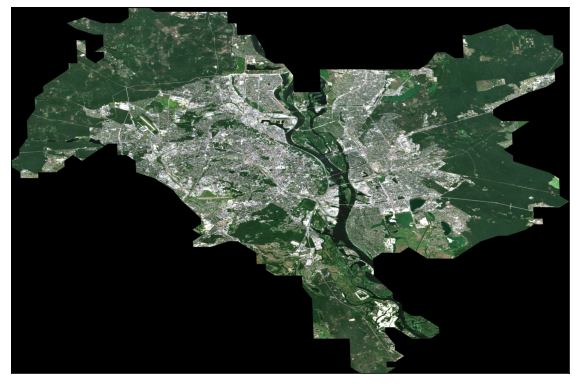

In [9]:
plot_map(sentinelKyiv)